<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/Bitcoin_ML_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
babd_sample = pd.read_csv("/content/drive/MyDrive/combined_babd_sample.csv")

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/bitcoin_final_label_dataset.csv")

In [ ]:
dataset.shape

(45010, 74)

In [ ]:
dataset.describe()

,input_value_mean,input_value_median,input_value_variance,input_value_maximum,input_value_minimum,input_value_skewness,input_value_kurtosis,input_value_25th_percentile,input_value_75th_percentile,input_value_range,...,output_time_diff_variance,output_time_diff_maximum,output_time_diff_minimum,output_time_diff_skewness,output_time_diff_kurtosis,output_time_diff_25th_percentile,output_time_diff_75th_percentile,output_time_diff_range,output_transaction_count,label
count,4.473000e+04,4.473000e+04,1.595100e+04,4.473000e+04,4.473000e+04,10547.000000,8042.000000,4.473000e+04,4.473000e+04,4.473000e+04,...,1.801400e+04,4.487500e+04,44875.0,13110.000000,9196.000000,4.487500e+04,4.487500e+04,4.487500e+04,44875.000000,45010.000000
mean,8.279078e+07,6.171187e+07,8.169116e+19,1.649142e+08,4.652757e+07,1.281942,9.297052,5.400480e+07,9.907006e+07,1.183867e+08,...,2.660246e+13,2.056775e+06,0.0,1.934200,90.565784,1.992207e+05,8.547502e+05,2.056775e+06,49.913226,1.553299
std,6.739600e+09,6.152744e+09,6.152143e+21,1.083092e+10,5.879664e+09,2.235702,134.357699,5.949680e+09,7.676680e+09,9.093018e+09,...,1.255558e+14,6.193152e+06,0.0,7.362330,2583.318850,8.641538e+05,3.027106e+06,6.193152e+06,2672.211075,1.126600
min,5.460000e+02,5.460000e+02,0.000000e+00,5.460000e+02,2.950000e+02,-7.403447,-6.000000,5.460000e+02,5.460000e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,-7.582981,-5.996755,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,6.081003e+05,5.298210e+05,1.980049e+11,7.030580e+05,2.333672e+05,0.002505,-0.124918,4.413537e+05,6.211668e+05,0.000000e+00,...,5.967156e+08,0.000000e+00,0.0,0.145121,1.127032,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
50%,1.950114e+06,1.673998e+06,8.205681e+12,2.447152e+06,1.038978e+06,1.321595,2.364237,1.403801e+06,2.010478e+06,0.000000e+00,...,3.637769e+11,0.000000e+00,0.0,1.648851,3.999896,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2.000000
75%,7.777347e+06,6.635923e+06,1.262223e+14,1.140307e+07,3.745984e+06,1.984772,5.483903,5.300000e+06,8.667255e+06,1.455020e+06,...,5.722086e+12,4.498880e+05,0.0,2.236068,7.537100,1.776250e+03,9.860125e+04,4.498880e+05,3.000000,3.000000
max,1.197964e+12,1.197964e+12,5.694677e+23,1.307060e+12,1.197964e+12,97.126586,11209.665941,1.197964e+12,1.197964e+12,1.307060e+12,...,2.548927e+15,8.006036e+07,0.0,412.294068,184293.726480,1.784982e+07,5.354944e+07,8.006036e+07,357083.000000,3.000000


In [ ]:
dataset.head()

,account,input_value_mean,input_value_median,input_value_variance,input_value_maximum,input_value_minimum,input_value_skewness,input_value_kurtosis,input_value_25th_percentile,input_value_75th_percentile,...,output_time_diff_variance,output_time_diff_maximum,output_time_diff_minimum,output_time_diff_skewness,output_time_diff_kurtosis,output_time_diff_25th_percentile,output_time_diff_75th_percentile,output_time_diff_range,output_transaction_count,label
0,112aMbzaifSzz17dt4iieNBNRaNMPMsBhN,4.126654e+06,3775772.0,1.430222e+13,10000000.0,100000.0,0.960194,1.074525,1757500.0,5000000.0,...,3.195106e+14,40034756.0,0.0,2.235975,4.999665,23241.0,188317.0,40034756.0,5.0,0
1,112uqsxthsgX3bBSJzTaZngaNQhPfHnoa6,6.914500e+06,6914500.0,6.119498e+13,12446000.0,1383000.0,NaN,NaN,4148750.0,9680250.0,...,5.660480e+05,1064.0,0.0,NaN,NaN,266.0,798.0,1064.0,2.0,1
2,1131uSp9Aq2vf5kfxUCaP68nFsBoSoKByk,3.880419e+06,1104075.0,6.499291e+13,53137394.0,547.0,3.927683,17.282748,483815.5,3048058.0,...,3.419762e+09,451766.0,0.0,4.170106,24.283287,2066.0,42373.0,451766.0,113.0,1
3,1136NPxiQgXe7a4hXoUmD8XwuUyBrwBjni,3.068000e+06,3068000.0,NaN,3068000.0,3068000.0,NaN,NaN,3068000.0,3068000.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1
4,113EN2Wep2eXUY7M7H4XNGGE9evGnVowR4,3.719556e+07,37195558.0,NaN,37195558.0,37195558.0,NaN,NaN,37195558.0,37195558.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1


In [ ]:
# Example: Basic cleaning steps
dataset.drop_duplicates(inplace=True)


In [ ]:
dataset.shape

(45010, 74)

In [ ]:
null_counts = dataset.isnull().sum()
for column, count in null_counts.items():
    print(f"Column: {column}, Null Count: {count}")

Column: account, Null Count: 0
Column: input_value_mean, Null Count: 280
Column: input_value_median, Null Count: 280
Column: input_value_variance, Null Count: 29059
Column: input_value_maximum, Null Count: 280
Column: input_value_minimum, Null Count: 280
Column: input_value_skewness, Null Count: 34463
Column: input_value_kurtosis, Null Count: 36968
Column: input_value_25th_percentile, Null Count: 280
Column: input_value_75th_percentile, Null Count: 280
Column: input_value_range, Null Count: 280
Column: input_value_usd_mean, Null Count: 280
Column: input_value_usd_median, Null Count: 280
Column: input_value_usd_variance, Null Count: 29059
Column: input_value_usd_maximum, Null Count: 280
Column: input_value_usd_minimum, Null Count: 280
Column: input_value_usd_skewness, Null Count: 34463
Column: input_value_usd_kurtosis, Null Count: 36968
Column: input_value_usd_25th_percentile, Null Count: 280
Column: input_value_usd_75th_percentile, Null Count: 280
Column: input_value_usd_range, Null Co

In [ ]:
threshold = len(dataset) * 0.5
reduced_dataset = dataset.dropna(thresh=threshold, axis=1)

In [ ]:
null_counts = reduced_dataset.isnull().sum()
for column, count in null_counts.items():
    print(f"Column: {column}, Null Count: {count}")

Column: account, Null Count: 0
Column: input_value_mean, Null Count: 280
Column: input_value_median, Null Count: 280
Column: input_value_maximum, Null Count: 280
Column: input_value_minimum, Null Count: 280
Column: input_value_25th_percentile, Null Count: 280
Column: input_value_75th_percentile, Null Count: 280
Column: input_value_range, Null Count: 280
Column: input_value_usd_mean, Null Count: 280
Column: input_value_usd_median, Null Count: 280
Column: input_value_usd_maximum, Null Count: 280
Column: input_value_usd_minimum, Null Count: 280
Column: input_value_usd_25th_percentile, Null Count: 280
Column: input_value_usd_75th_percentile, Null Count: 280
Column: input_value_usd_range, Null Count: 280
Column: input_spending_value_usd_mean, Null Count: 280
Column: input_spending_value_usd_median, Null Count: 280
Column: input_spending_value_usd_maximum, Null Count: 280
Column: input_spending_value_usd_minimum, Null Count: 280
Column: input_spending_value_usd_25th_percentile, Null Count: 2

In [ ]:
# Filling null values with zero
filled_dataset = reduced_dataset.fillna(0)

filled_dataset

,account,input_value_mean,input_value_median,input_value_maximum,input_value_minimum,input_value_25th_percentile,input_value_75th_percentile,input_value_range,input_value_usd_mean,input_value_usd_median,...,output_value_usd_range,output_time_diff_mean,output_time_diff_median,output_time_diff_maximum,output_time_diff_minimum,output_time_diff_25th_percentile,output_time_diff_75th_percentile,output_time_diff_range,output_transaction_count,label
0,112aMbzaifSzz17dt4iieNBNRaNMPMsBhN,4.126654e+06,3775772.0,10000000.0,100000.0,1757500.0,5000000.0,9900000.0,683.768800,543.53800,...,1849.8077,8.059503e+06,51199.0,40034756.0,0.0,23241.0,188317.0,40034756.0,5.0,0
1,112uqsxthsgX3bBSJzTaZngaNQhPfHnoa6,6.914500e+06,6914500.0,12446000.0,1383000.0,4148750.0,9680250.0,11063000.0,3298.285750,3298.28575,...,5277.1619,5.320000e+02,532.0,1064.0,0.0,266.0,798.0,1064.0,2.0,1
2,1131uSp9Aq2vf5kfxUCaP68nFsBoSoKByk,3.880419e+06,1104075.0,53137394.0,547.0,483815.5,3048058.0,53136847.0,463.907935,161.87540,...,5801.8277,3.378796e+04,11521.0,451766.0,0.0,2066.0,42373.0,451766.0,113.0,1
3,1136NPxiQgXe7a4hXoUmD8XwuUyBrwBjni,3.068000e+06,3068000.0,3068000.0,3068000.0,3068000.0,3068000.0,0.0,260.120100,260.12010,...,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,113EN2Wep2eXUY7M7H4XNGGE9evGnVowR4,3.719556e+07,37195558.0,37195558.0,37195558.0,37195558.0,37195558.0,0.0,3854.646500,3854.64650,...,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45005,bc1qxa4ueh38afvkd5tp6fn8df2nexfqp7tqgrdrzf,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45006,bc1qyjwa0tf0en4x09magpuwmt2smpsrlaxwn85lh6,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45007,bc1qz6s6lhyqhfjgexmsjv00grkwaw6kpdnl3h9x0e,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45008,bc1qz7d7sd7e30t34as8fza2llznxylwfr628g073x,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [ ]:
null_counts = filled_dataset.isnull().sum()
for column, count in null_counts.items():
    print(f"Column: {column}, Null Count: {count}")

Column: account, Null Count: 0
Column: input_value_mean, Null Count: 0
Column: input_value_median, Null Count: 0
Column: input_value_maximum, Null Count: 0
Column: input_value_minimum, Null Count: 0
Column: input_value_25th_percentile, Null Count: 0
Column: input_value_75th_percentile, Null Count: 0
Column: input_value_range, Null Count: 0
Column: input_value_usd_mean, Null Count: 0
Column: input_value_usd_median, Null Count: 0
Column: input_value_usd_maximum, Null Count: 0
Column: input_value_usd_minimum, Null Count: 0
Column: input_value_usd_25th_percentile, Null Count: 0
Column: input_value_usd_75th_percentile, Null Count: 0
Column: input_value_usd_range, Null Count: 0
Column: input_spending_value_usd_mean, Null Count: 0
Column: input_spending_value_usd_median, Null Count: 0
Column: input_spending_value_usd_maximum, Null Count: 0
Column: input_spending_value_usd_minimum, Null Count: 0
Column: input_spending_value_usd_25th_percentile, Null Count: 0
Column: input_spending_value_usd_75

In [ ]:
df = filled_dataset.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
df.set_index('account', inplace=True)

In [ ]:
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_strat)
X_test_scaled = scaler.transform(X_test_strat)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import joblib

n_models = 5
models = []

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=n_models, test_size=0.3, random_state=42)

def train_model(train_index):
    # Sample training data
    X_train_sample = X_train_scaled[train_index]
    y_train_sample = y_train_strat.iloc[train_index]

    # Create and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train_sample, y_train_sample)

    # # Optionally, log the model's performance on a validation set
    # val_score = accuracy_score(y_val, model.predict(X_val_scaled))
    # print(f"Model {i+1} validation accuracy: {val_score}")

    return model

# Train models in parallel
models = joblib.Parallel(n_jobs=-1)(joblib.delayed(train_model)(train_index) for train_index, _ in sss.split(X_train_scaled, y_train_strat))


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Aggregate predictions
predictions = [model.predict(X_test_scaled) for model in models]
final_predictions = np.array(predictions).mean(axis=0).round()

accuracy = accuracy_score(y_test_strat, final_predictions)
f1 = f1_score(y_test_strat, final_predictions, average='weighted')
print(f"Ensemble accuracy: {accuracy}")
print(f"Ensemble F1 score: {f1}")


Ensemble accuracy: 0.6217507220617641
Ensemble F1 score: 0.6203614382037471


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

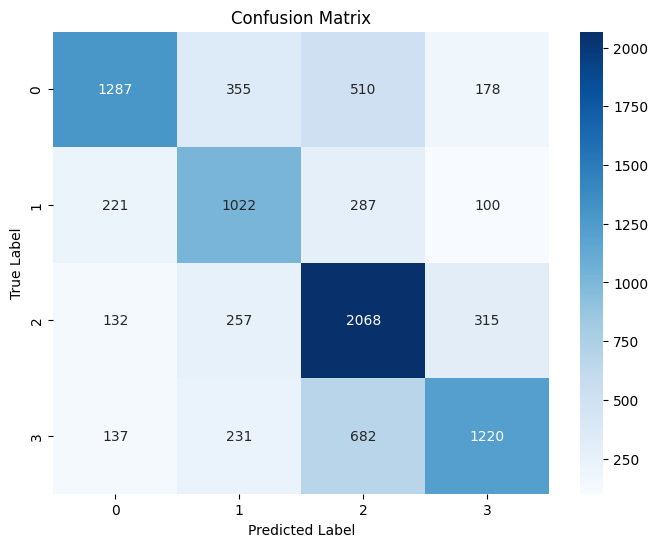

In [ ]:
cm = confusion_matrix(y_test_strat, final_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

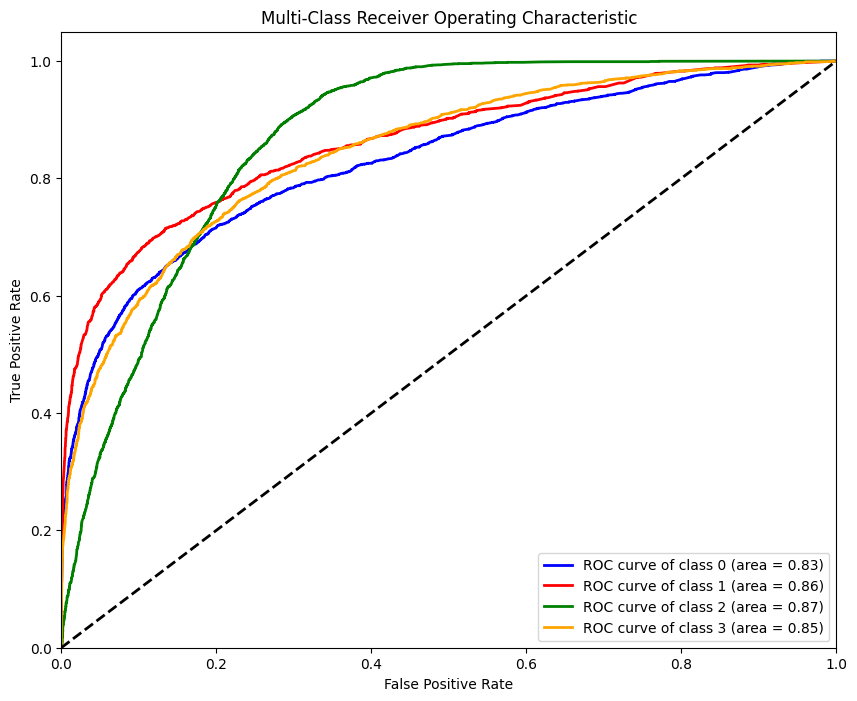

In [ ]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

prob_predictions = [model.predict_proba(X_test_scaled) for model in models]

# Average the probabilities to get final prediction probabilities
final_prob_predictions = np.mean(prob_predictions, axis=0)

# Binarize the labels
y_test_binarized = label_binarize(y_test_strat, classes=np.unique(y_test_strat))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], final_prob_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Add more colors if needed
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [ ]:
# Hyperparameter grids
rf_grid = {'n_estimators': [200, 500], 'max_depth': [10, 20, None]}
svm_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
xgb_grid = {'n_estimators': [200, 500], 'learning_rate': [0.05, 0.1]}
catboost_grid = {'iterations': [200, 500], 'learning_rate': [0.05, 0.1], 'depth': [8, 13]}

In [ ]:
# Number of folds for k-fold CV
n_folds = 5

# Models
models_list = {
    'RF': RandomForestClassifier(),
    # 'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # verbose=0 to silence CatBoost output
}

# Grids
grids = {
    'RF': rf_grid,
    # 'SVM': svm_grid,
    'XGBoost': xgb_grid,
    'CatBoost': catboost_grid
}

# Results dictionary
tuned_models = {}


In [ ]:
# Fitting 5 folds for each of 6 candidates, totalling 30 fits
# Best Parameters for RF: {'max_depth': 20, 'n_estimators': 200}
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
# Best Parameters for SVM: {'C': 10, 'gamma': 1}
# Fitting 5 folds for each of 4 candidates, totalling 20 fits
# Best Parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}
# Fitting 5 folds for each of 8 candidates, totalling 40 fits

In [ ]:
for model_key in models_list.keys():
    grid_search = GridSearchCV(estimator=models_list[model_key], param_grid=grids[model_key], cv=KFold(n_splits=n_folds), n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train_strat)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    tuned_models[model_key] = best_model
    print(f"Best Parameters for {model_key}: {best_params}")


## Model Training with K fold

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth=20, n_estimators=200)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5)  # 5 folds
fold = 1
for train_index, test_index in kf.split(X_train_scaled, y_train_strat):
    X_train, X_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train, y_test = y_train_strat[train_index], y_train_strat[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print accuracy for each fold
    print(f"Accuracy for fold {fold}: {accuracy_score(y_test, y_pred)}")
    fold += 1

# Feature importance
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

Accuracy for fold 1: 0.6555123576784226
Accuracy for fold 2: 0.6645376284365454
Accuracy for fold 3: 0.6606498194945848
Accuracy for fold 4: 0.648104429940286
Accuracy for fold 5: 0.655464518816831
Feature Importances: [0.02306165 0.02238571 0.02466334 0.03011077 0.02332616 0.02475085
 0.01459145 0.01842992 0.01882072 0.01875402 0.01956474 0.01813235
 0.01787742 0.00800456 0.02137086 0.0221837  0.02281449 0.02342467
 0.02182867 0.02190409 0.00892047 0.01478218 0.02380203 0.01351099
 0.         0.02446091 0.02109014 0.01279584 0.02145016 0.02771367
 0.027355   0.02760066 0.03271971 0.02640457 0.02753288 0.00878371
 0.01978472 0.01959729 0.01987281 0.02116843 0.02044377 0.01957818
 0.01132914 0.02477653 0.01930513 0.02147588 0.         0.01003092
 0.02223311 0.02658743 0.00889361]


In [ ]:
# Test the final model
y_pred_test = model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test_strat, y_pred_test)}")

Test Accuracy: 0.6584092423905799


In [ ]:
# Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(importances)

Feature Importances:
                                     Feature  Importance
32                      output_value_minimum    0.032720
3                        input_value_minimum    0.030111
29                         output_value_mean    0.027714
31                      output_value_maximum    0.027601
34              output_value_75th_percentile    0.027533
30                       output_value_median    0.027355
49                    output_time_diff_range    0.026587
33              output_value_25th_percentile    0.026405
43                     output_time_diff_mean    0.024777
5                input_value_75th_percentile    0.024751
2                        input_value_maximum    0.024663
25           input_time_diff_25th_percentile    0.024461
22                    input_time_diff_median    0.023802
17          input_spending_value_usd_minimum    0.023425
4                input_value_25th_percentile    0.023326
0                           input_value_mean    0.023062
16        

In [ ]:
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target

# Columns to be dropped
columns_to_drop = ['output_transaction_count', 'output_value_range', 'input_value_usd_range',
                   'input_time_diff_minimum', 'output_time_diff_minimum']

# Drop the specified columns
X = X.drop(columns=columns_to_drop, axis=1)

# Stratified train-test split
X_train, X_test, y_train, y_test_or = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(max_depth=20, n_estimators=200)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5)  # 5 folds
fold = 1
for train_index, test_index in kf.split(X_train_scaled, y_train_strat):
    X_train, X_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train, y_test = y_train_strat[train_index], y_train_strat[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print accuracy for each fold
    print(f"Accuracy for fold {fold}: {accuracy_score(y_test, y_pred)}")
    fold += 1




Accuracy for fold 1: 0.6539850041655095
Accuracy for fold 2: 0.6627325742849208
Accuracy for fold 3: 0.6584282143848931
Accuracy for fold 4: 0.648104429940286
Accuracy for fold 5: 0.6547701708096098


ValueError: ignored

In [ ]:
# Test the final model
y_pred_test = model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test_or, y_pred_test)}")

Test Accuracy: 0.6575205509886692
